# Evolution of Szekeres's Cosmological Models by Bonner and Tomimura
##  Geoff Cope
##  Univeristy of Utah
##  January 5th, 2022

https://adsabs.harvard.edu/full/1976MNRAS.175...85B

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,x,y,z,dt,dx,dy,dz = symbols('t x y z dt dx dy dz')

In [4]:
Q = Function('Q')(t,x,y,z)
Q

In [5]:
A = Function('A')(x,y,z)
A

In [6]:
R = Function('R')(t)
R

In [7]:
T = Function('T')(x,t)
T

In [8]:
h = Function('h')(y)
h

In [10]:
equation2pt2a = Eq(Q,A*R+T)
equation2pt2a

In [11]:
variables = Matrix( [t,x,y,z] )
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [13]:
differentials = Matrix( [dt,dx,dy,dz] ) 
differentials

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [14]:
lineElement = expand( -Q**2 * dx**2 - R**2 * (dy**2 + h**2 * dz**2 ) + dt**2 ) 
lineElement

In [17]:
lineElement.subs( equation2pt2a.args[0],equation2pt2a.args[1] ) 

In [18]:
expand( lineElement.subs( equation2pt2a.args[0],equation2pt2a.args[1] ) ) 

In [19]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡1         0           0          0      ⎤
⎢                                        ⎥
⎢     2                                  ⎥
⎢0  -Q (t, x, y, z)    0          0      ⎥
⎢                                        ⎥
⎢                      2                 ⎥
⎢0         0         -R (t)       0      ⎥
⎢                                        ⎥
⎢                              2     2   ⎥
⎣0         0           0     -R (t)⋅h (y)⎦

In [26]:
import sympy

In [30]:
m = sympy.Array(g)
m

⎡1         0           0          0      ⎤
⎢                                        ⎥
⎢     2                                  ⎥
⎢0  -Q (t, x, y, z)    0          0      ⎥
⎢                                        ⎥
⎢                      2                 ⎥
⎢0         0         -R (t)       0      ⎥
⎢                                        ⎥
⎢                              2     2   ⎥
⎣0         0           0     -R (t)⋅h (y)⎦

In [31]:
from einsteinpy.symbolic import *

In [32]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [33]:
metric = MetricTensor(m,syms)

In [34]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                          ⎡                
⎢                                                                          ⎢                
⎢                                                                          ⎢                
⎢                                                                          ⎢        0       
⎢                                                                          ⎢                
⎢⎡0                 0                       0                 0         ⎤  ⎢                
⎢⎢                                                                      ⎥  ⎢∂               
⎢⎢                 ∂                                                    ⎥  ⎢──(Q(t, x, y, z)
⎢⎢0  Q(t, x, y, z)⋅──(Q(t, x, y, z))        0                 0         ⎥  ⎢∂t              
⎢⎢                 ∂t                                                 

In [35]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                 2           2                                                             
⎢                d           ∂                                                              
⎢             2⋅───(R(t))   ───(Q(t, x, y, z))                                              
⎢                 2           2                                                             
⎢               dt          ∂t                                                              
⎢           - ─────────── - ──────────────────                                              
⎢                 R(t)        Q(t, x, y, z)                                                 
⎢                                                                                           
⎢                                                          ⎛              2                 
⎢                                                          ⎜ 2     2     ∂                  
⎢                                                          ⎜R (t)⋅h (y

In [36]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                  2                        2                               
⎢                   2    ⎛d       ⎞                        d                    2    ∂      
⎢1.0⋅Q(t, x, y, z)⋅h (y)⋅⎜──(R(t))⎟  - Q(t, x, y, z)⋅h(y)⋅───(h(y)) + 2.0⋅R(t)⋅h (y)⋅──(Q(t,
⎢                        ⎝dt      ⎠                         2                        ∂t     
⎢                                                         dy                                
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                   Q(t, x, 
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

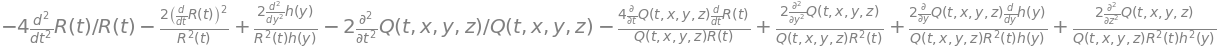

In [37]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [38]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [39]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

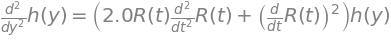

In [55]:
#  Here we take a term of the 1-1 component of Einstein and set it equal to zero and solve for h double prime
equation2pt3a = Eq( diff(h,y,y),solve( simplify(einst.tensor())[1,1].args[3] , diff(h,y,y) )[0] ) 
equation2pt3a

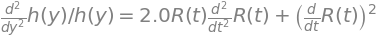

In [68]:
equation2pt3b = Eq((1/h)*equation2pt3a.lhs,(1/h)*equation2pt3a.rhs  )
equation2pt3b

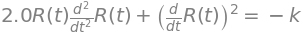

In [70]:
equation2pt3 = Eq( equation2pt3b.rhs , -k ) 
equation2pt3

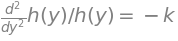

In [71]:
equation2pt4 = Eq( equation2pt3b.lhs , -k ) 
equation2pt4

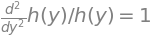

In [72]:
#  Hyperbolic case k = -1 
equation2pt4.subs(k,-1)

In [117]:
#  Hyperbolic case k = -1 
hyperbolicODEsolution = dsolve( equation2pt4.subs(k,-1) ) 
hyperbolicODEsolution

In [118]:
#  Here we arbitrarily set the constants of integration to one... this can be changed 
hyperbolicParticularSol = hyperbolicODEsolution.subs( hyperbolicODEsolution.rhs.args[0].args[0],1).subs(hyperbolicODEsolution.rhs.args[1].args[0],1)
hyperbolicParticularSol

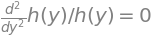

In [73]:
#  Parabolic case k = 0 
equation2pt4.subs(k,0)

In [79]:
#  Parabolic case k = 0 
parabolicODEsolution = dsolve( equation2pt4.subs(k,0) ) 
parabolicODEsolution

In [98]:
#  Here we arbitrarily set the constants of integration to one... this can be changed 
parabolicODEsolution.subs(parabolicODEsolution.rhs.args[0],1 ).subs(parabolicODEsolution.rhs.args[1].args[0],1)

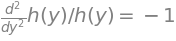

In [74]:
#  Ellipic case k = 1
equation2pt4.subs(k,1)

In [80]:
#  Ellipic case k = 1
hyperbolicODEsolution = dsolve( equation2pt4.subs(k,1) ) 
hyperbolicODEsolution

In [89]:
#  Here we arbitrarily set the constants of integration to one... 
hyperbolicParticularSol = hyperbolicODEsolution.subs(hyperbolicODEsolution.rhs.args[0].args[0],1).subs(hyperbolicODEsolution.rhs.args[1].args[0],1)
hyperbolicParticularSol

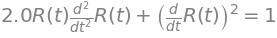

In [111]:
#  Hyperbolic case k = -1 
equation2pt3.subs(k,-1)

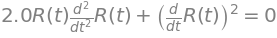

In [112]:
#  Parabolic case k = 0 
equation2pt3.subs(k,0)

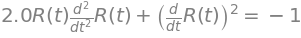

In [113]:
#  Ellipic case k = 1
equation2pt3.subs(k,1)

https://www.sympy.org/scipy-2017-codegen-tutorial/notebooks/20-ordinary-differential-equations.html